<a href="https://colab.research.google.com/github/thisanches07/Algoritmo-Genetico/blob/main/AC2_Algoritmo_Genetico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Centro Universitário Facens<br/></center>
<br/>
<font size="4"><center><b>Disciplina: Inteligência Computacional</b></center></font>
  
<font size="3"><center>Prof. Renato M. Silva</center></font>
<br/>
<br/>

## <center>Avaliação Continuada 2 (AC2)</center>



----
### <center>Nome e RA dos componentes do grupo</center>

    
| Nome     |      RA      | 
|:-        |:-------------:|
| Mateus da Silva Prado     |190477              | 
|Pedro Paulo Menezes Sasso          |190217              | 
| Thiago Sanches         |190006              | 

    

----
### Instruções gerais
**1**. Siga boas práticas de programação:
- dar nomes intuitivos para as variáveis
- dar nomes intuitivos para as funções

**2**. O trabalho pode ser feito em grupos de até 3 pessoas. 
 - Não é permitido que o grupo tenha pessoas de uma turma diferente da sua. 
 - Caso o grupo tenha pessoas de turmas diferentes, todo o grupo receberá nota zero.
 - Apenas uma pessoa do grupo deve submeter o trabalho. 
 

# Implementação

Vocês deverão implementar a solução para um problema de regressão usando algoritmos genéticos conforme as regras descritas a seguir.

---

Os dados para a criação do modelo devem ser carregados a partir do arquivo `dataset.csv`

As diretrizes para as etapas do algoritmo genético deverão ser implementadas como descritas a seguir:

- Geração
  - Os indivíduos devem ser carregados a partir do arquivo `individuos.csv`.
  - Vocês deverão manter a população com 200 indivíduos.
- Seleção
  - A medida de performance (fitness) a ser utilizada é MAE.
    - Para saber se a implementação está correta, o MAE para o primeiro indíviduo do arquivo disponibilizado é `52.78`.
  - A estratégia de seleção é pegar os 50% melhores.
- Cruzamento
  - O cruzamento deverá acontecer entre os indíviduos ímpares e pares em ordem de melhor fitness, por exemplo, indíviduo 1 com 2, 3 com 4. Deverão ser integrados à população a combinação dos genes a e b, resultando em dois filhos para cada cruzamento. Por exemplo:
    - Seja 2 indivíduos [3,4] e [5,6], seus filhos serão:
      - [3,6]
      - [5,4]
- Mutação
  - Você deverá avaliar o método com mutação e sem mutação, apresentando um gráfico com os resultados comparativos entre o processo com mutação e sem mutação. Você deverá escolher o percentual de chance de mutação e o percentual de mutação máxima em cada gene.
- Voltar para seleção até totalizar 10 gerações.

In [3]:

import pandas as pd

df = pd.read_csv('dataset.csv')
individuos = pd.read_csv('individuos.csv')
print('dados importados com sucesso')



dados importados com sucesso


In [ ]:
individuos

[(28, 7), (28, 7), (28, 7)]
6.304539945981138


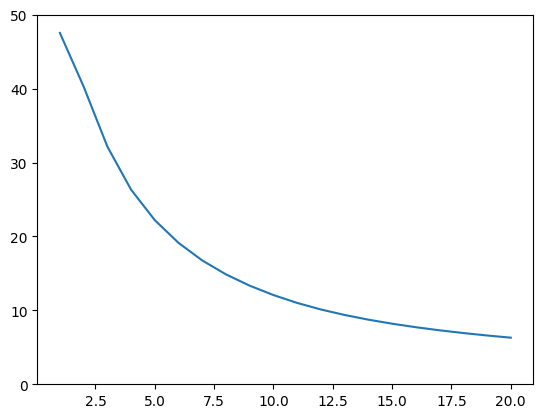

In [80]:
from numpy.core.fromnumeric import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt


X = df['x']
y = df['y']

tamanho_populacao = 200
num_generations = 20
gen_errors = []
mean_errors = []

def fitness(individual):
    a, b = individual
    Y_pred = a*X + b
    mae = np.mean(np.abs(y - Y_pred))
    
    gen_errors.append(mae)
    # if(a == 12 and b ==16):
    #   print('mae = ',mae, ' a=',a,' b=',b)
    return 1/mae

# coloca valores de a e b em um array
populacao = [(row['a'], row['b']) for index, row in individuos.iterrows()]


for generation in range(num_generations):
    # Avalia cada indivíduo na população atraves do MAE
    fitness_values = [fitness(individual) for individual in populacao]
    mean_errors.append(mean(gen_errors))
    
    
    # Seleciona os melhores indivíduos para cruzamento, ordena a população pelo desempenho dos indivíduos (fitness) em ordem decrescente
    populacao_ordenada = sorted(populacao, key=fitness, reverse=True)

    populacao_selecionada = populacao_ordenada[:tamanho_populacao//2]


    # Aplica crossover e mutação para gerar novos indivíduos
    new_population = []
    for i in range(0, len(populacao_selecionada), 2):
      tupla1 = populacao_selecionada[i]
      tupla2 = populacao_selecionada[i+1]

      new_population.append(tuple((tupla1[0],tupla2[1])))
      new_population.append(tuple((tupla2[0],tupla1[1])))
    populacao = populacao_selecionada + new_population


print(populacao[:3])

print(mean_errors[-1])

plt.plot(range(1,num_generations+1), mean_errors)

plt.ylim(0,50)

plt.show()



[]
Us mio  [(28.966509671756135, 7), (29.536430957939473, 7.279001639376887), (29.536430957939473, 7)]
Us pió [(29.536430957939473, 57.04036036336876), (29.536430957939473, 7), (29.536430957939473, 7)]
13.851500343042973


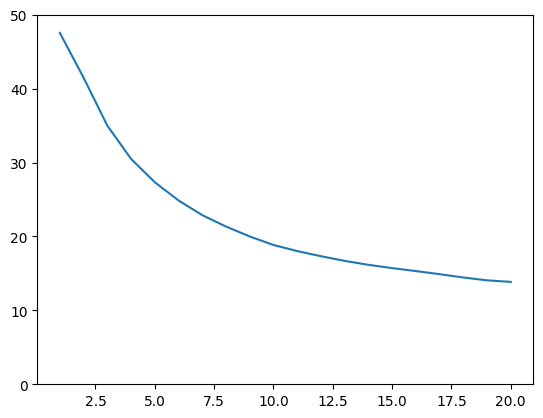

In [83]:
import random

mutation_rate = 0.25
gen_errors = []
mean_errors = []

print(mean_errors)

def fitness(individual):
    a, b = individual
    Y_pred = a*X + b
    mae = np.mean(np.abs(y - Y_pred))
    
    gen_errors.append(mae)
    # if(a == 12 and b ==16):
    #   print('mae = ',mae, ' a=',a,' b=',b)
    return 1/mae

# coloca valores de a e b em um array
populacao = [(row['a'], row['b']) for index, row in individuos.iterrows()]


for generation in range(num_generations):
    # Avalia cada indivíduo na população atraves do MAE
    fitness_values = [fitness(individual) for individual in populacao]
    mean_errors.append(mean(gen_errors))
    
    # Seleciona os melhores indivíduos para cruzamento, ordena a população pelo desempenho dos indivíduos (fitness) em ordem decrescente
    populacao_ordenada = sorted(populacao, key=fitness, reverse=True)

    populacao_selecionada = populacao_ordenada[:tamanho_populacao//2]


    # Aplica crossover e mutação para gerar novos indivíduos
    new_population = []
    for i in range(0, len(populacao_selecionada), 2):
      tupla1 = populacao_selecionada[i]
      tupla2 = populacao_selecionada[i+1]


      if random.random() < mutation_rate:
            tupla1 = (abs(tupla1[0] + random.uniform(-100, 100)), abs(tupla1[1] + random.uniform(-100, 100))) # mutação aleatória
          

      if random.random() < mutation_rate:
            tupla2 = (abs(tupla2[0] + random.uniform(-100, 100)), abs(tupla2[1] + random.uniform(-100, 100))) # mutação aleatória
           

      new_population.append(tuple((tupla1[0],tupla2[1])))
      new_population.append(tuple((tupla2[0],tupla1[1])))
    populacao = populacao_selecionada + new_population

print("Us mio ",populacao[:3])
print("Us pió",populacao[-3:])
print(mean_errors[-1])

plt.plot(range(1,num_generations+1), mean_errors)

plt.ylim(0,50)

plt.show()